<a href="https://colab.research.google.com/github/danyathecoder/DSP/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original image


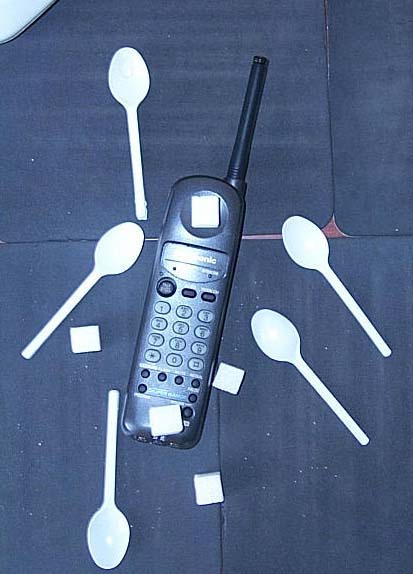

Greyscaled image


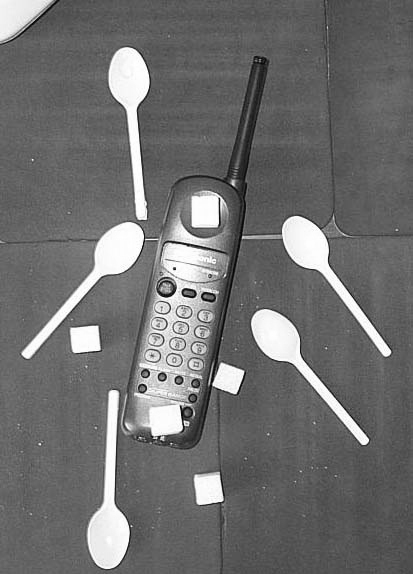

Thresholding value is 112
Binarized image


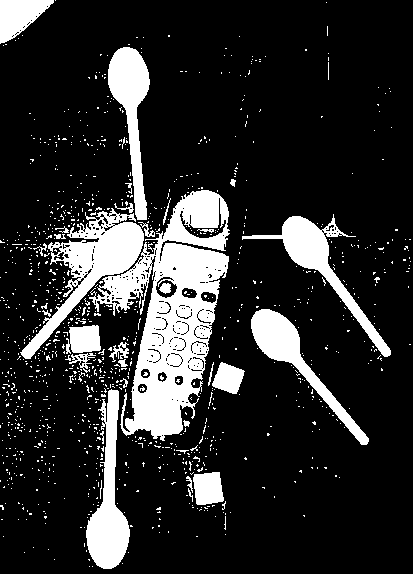

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))

    print("Kernel Shape : {}".format(kernel.shape))

    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))

    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()

    return output

def show_text_img(text:str, img: np.ndarray) -> None:
    print(text)
    cv2_imshow(img)

def grayscale(img: np.ndarray) -> np.ndarray:
    h = img.shape[0]
    w = img.shape[1]
    grey_filter = np.array([0.2989,0.5870,0.1140])
    r_img, g_img, b_img = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    grey_img = r_img * grey_filter[0] + g_img * grey_filter[1] + b_img * grey_filter[2]

    show_text_img('Greyscaled image', grey_img)

    return grey_img

def convert_binary(img, thresh_val):
    white = 255
    black = 0
    
    initial_conv = np.where((img <= thresh_val), img, white)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, black)
    
    return final_conv

def binarize(img: np.ndarray, thresh_val=128, grey=False) -> np.ndarray:
  if not grey:
    grey_img = grayscale(img)

  thresh_val = otsu_method(grey_img)
  bin_img = convert_binary(grey_img, thresh_val)

  show_text_img('Binarized image', bin_img)

  return bin_img

def otsu_method(grey_img: np.ndarray) -> int:
  sigma_max = 0
  thresh_max = 0
  for thresh in range(1, 255):
    v0 = grey_img[np.where(grey_img <= thresh)]
    v1 = grey_img[np.where(grey_img > thresh)]
    m0 = np.mean(v0) if len(v0) > 0 else 0
    m1 = np.mean(v1) if len(v1) > 0 else 0
    w0 = len(v0) * v0.size
    w1 = len(v1) * v1.size
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > sigma_max:
      sigma_max = sigma
      thresh_max = thresh
    
  print('Thresholding value is {}'.format(thresh_max))
  return thresh_max


def main():
  filename = 'P0001467.jpg'
  staff = cv.imread(filename)
  
  show_text_img('Original image', staff)
  binarize(staff, 100)


main()